In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
data = pd.read_csv("train.csv")

data.apply(lambda x: sum(x.isnull()), axis=0)
data.Gender = data.Gender.fillna('Male')
data.Married = data.Married.fillna('Yes')
data.Dependents = data.Dependents.fillna('0')
data.Self_Employed = data.Self_Employed.fillna('No')
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(360.0)
data.Credit_History = data.Credit_History.fillna(1.0)
data.apply(lambda x: sum(x.isnull()), axis=0)
data.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [36]:

# Splitting traing data
X = data.iloc[:, 1: 12].values
y = data.iloc[:, 12].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 / 3, random_state=0)
# Encoding categorical data
# Encoding the Independent Variable

labelencoder_X = LabelEncoder()

X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
X[:, 4] = labelencoder_X.fit_transform(X[:, 4])

X[:, 10] = labelencoder_X.fit_transform(X[:, 10])

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)


## create tree for differential description

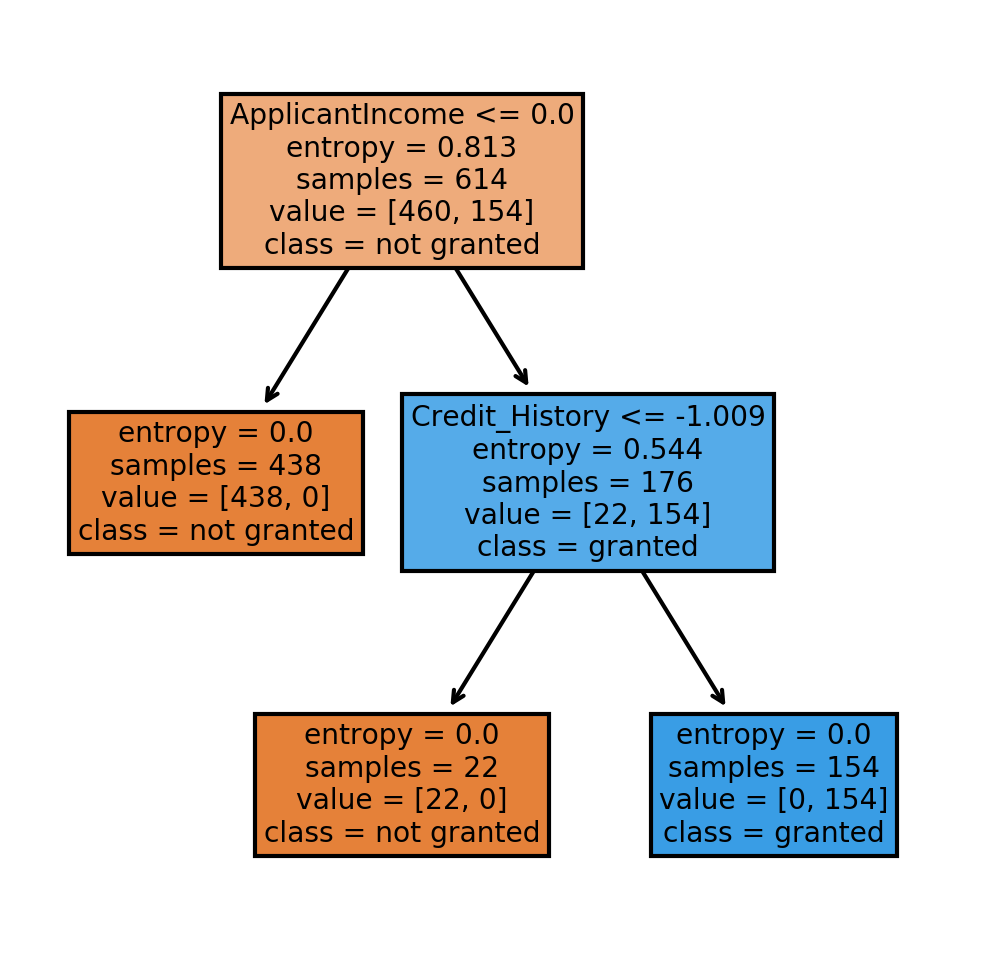

In [37]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import math

y_clust = np.zeros((len(y)), dtype=np.int)


def intersection(lst1, lst2):
    lst3 = [value for value in lst1[0] if value in lst2[0]]
    return lst3

def label_cluster(feat1, feat2):
    cr1 = X[:, feat1]
    index1 = np.where(cr1 > cr1.mean())
    cr2 = X[:, feat2]
    index2 = np.where(cr2 > cr2.mean())
    cr_comb = intersection(index1, index2)
    y_clust[cr_comb] = 1
    return y_clust

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
y_clust = label_cluster(5, 9)

classifier.fit(X, y_clust)

#model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0,  max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
#model.fit(X, y)
# Extract single tree
#estimator = model.estimators_[1]

fn = data.columns[1:12]
cn = ['not granted', 'granted']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(classifier,
               feature_names=fn,
               class_names=cn,
               filled=True);
fig.savefig('acustic_tree.png')


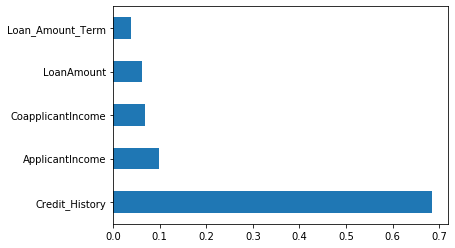

In [38]:
plt.show()
(pd.Series(model.feature_importances_, index=fn)
   .nlargest(5)
   .plot(kind='barh'))
plt.show()

## Create a decision tree classifier in subset and test its accuracy

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 / 3, random_state=0)
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc = metrics.accuracy_score(y_pred, y_test)
print("the accuracy of a decision tree trained as differential description of a cluster is: ", acc)

cm = confusion_matrix(y_test, y_pred)
print(cm)


the accuracy of a decision tree trained as differential description of a cluster is:  0.7853658536585366
[[ 27  33]
 [ 11 134]]


In [40]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.45      0.55        60
           1       0.80      0.92      0.86       145

    accuracy                           0.79       205
   macro avg       0.76      0.69      0.70       205
weighted avg       0.78      0.79      0.77       205

